# EDA

In [1]:
import pandas as pd
import numpy as np

## Load Train and Test Sets

In [2]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')
train.head()

,id,user_id,campaign_id,send_date,is_open,is_click
0,42_14051,14051,42,01-09-2017 19:55,0,0
1,52_134438,134438,52,02-11-2017 12:53,0,0
2,33_181789,181789,33,24-07-2017 15:15,0,0
3,44_231448,231448,44,05-09-2017 11:36,0,0
4,29_185580,185580,29,01-07-2017 18:01,0,0


## Load Campaign Data

In [3]:
pd.options.display.max_columns = 100

camp = pd.read_csv('input/campaign_data.csv')
camp.head()

,campaign_id,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,email_body,subject,email_url
0,29,Newsletter,67,61,12,3,"Dear AVians,\r\n \r\nWe are shaping up a super...",Sneak Peek: A look at the emerging data scienc...,http://r.newsletters.analyticsvidhya.com/7um44...
1,30,Upcoming Events,18,14,7,1,"Dear AVians,\r\n \r\nAre your eager to know wh...",[July] Data Science Expert Meetups & Competiti...,http://r.newsletters.analyticsvidhya.com/7up0e...
2,31,Conference,15,13,5,1,Early Bird Pricing Till August 07  Save upto ...,Last chance to convince your boss before the E...,http://r.newsletters.analyticsvidhya.com/7usym...
3,32,Conference,24,19,7,1,\r\n \r\nHi ?\r\n \r\nBefore I dive into why y...,A.I. & Machine Learning: 5 reasons why you sho...,http://r.newsletters.analyticsvidhya.com/7uthl...
4,33,Others,7,3,1,1,Fireside Chat with DJ Patil - the master is he...,"[Delhi NCR] Fireside Chat with DJ Patil, Forme...",http://r.newsletters.analyticsvidhya.com/7uvlg...


## Load Train and Test Sets with Derived Features

In [5]:
train_f = pd.read_csv('input/train_featv3.csv')
test_f = pd.read_csv('input/test_featv3.csv')
train_f.head()

,user_id,is_open,is_click,date,month,hour,mins,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,count_sent,count_word,count_unique_word,count_letters,count_punctuations,count_stopwords,mean_word_len,word_unique_percent,punct_percent,email_count_word,email_count_unique_word,email_count_letters,email_count_punctuations,email_cap_count,day_of_week,count_click,count_user,click_confidence,count_is_open,is_open_confidence,email_3_similar,sub_3_similar,campaign_id,sub_period,comm_type_click_percent,body_polarity,title_polarity,body_subjectivity,title_subjectivity
0,14051,0,0,1,9,19,55,3,88.0,79.0,13.0,4.0,1.0,12.0,12.0,88.0,5.0,2.0,6.416667,100.0,41.666667,238.0,159.0,1382.0,37.0,58.0,4,0.0,9.0,0.0,0.0,0.0,0.0,2.0,42,247,12.70333,0.278346,0.462500,0.644388,0.650000
1,134438,0,0,2,11,12,53,3,67.0,62.0,10.0,4.0,1.0,16.0,16.0,111.0,5.0,3.0,6.000000,100.0,31.250000,166.0,122.0,971.0,24.0,48.0,3,0.0,4.0,0.0,0.0,0.0,1.0,2.0,52,150,12.70333,0.071053,0.170455,0.376754,0.454545
2,181789,0,0,24,7,15,15,4,7.0,3.0,1.0,1.0,1.0,12.0,12.0,71.0,3.0,1.0,5.000000,100.0,25.000000,118.0,92.0,739.0,28.0,42.0,0,0.0,7.0,0.0,0.0,0.0,1.0,1.0,33,249,14.27746,0.408333,0.000000,0.579365,0.000000
3,231448,0,0,5,9,11,36,5,60.0,56.0,19.0,6.0,1.0,10.0,10.0,73.0,3.0,2.0,6.400000,100.0,30.000000,43.0,38.0,273.0,9.0,9.0,1,0.0,6.0,0.0,0.0,0.0,1.0,1.0,44,216,13.02976,0.166667,0.000000,0.766667,0.000000
4,185580,0,0,1,7,18,1,3,67.0,61.0,12.0,3.0,1.0,11.0,11.0,55.0,2.0,3.0,4.090909,100.0,18.181818,243.0,176.0,1498.0,37.0,35.0,5,0.0,5.0,0.0,0.0,0.0,0.0,1.0,29,220,12.70333,0.390083,0.000000,0.588671,0.000000


In [6]:
train_f.columns

Index(['user_id', 'is_open', 'is_click', 'date', 'month', 'hour', 'mins',
       'communication_type', 'total_links', 'no_of_internal_links',
       'no_of_images', 'no_of_sections', 'count_sent', 'count_word',
       'count_unique_word', 'count_letters', 'count_punctuations',
       'count_stopwords', 'mean_word_len', 'word_unique_percent',
       'punct_percent', 'email_count_word', 'email_count_unique_word',
       'email_count_letters', 'email_count_punctuations', 'email_cap_count',
       'day_of_week', 'count_click', 'count_user', 'click_confidence',
       'count_is_open', 'is_open_confidence', 'email_3_similar',
       'sub_3_similar', 'campaign_id', 'sub_period', 'comm_type_click_percent',
       'body_polarity', 'title_polarity', 'body_subjectivity',
       'title_subjectivity'],
      dtype='object')

## is_click Distribution

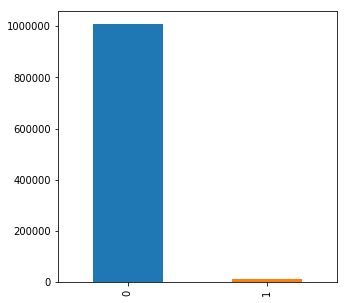

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

train_f.is_click.value_counts().plot(kind='bar', figsize=(5, 5))

## Distribution of Communication Type for is_click=1

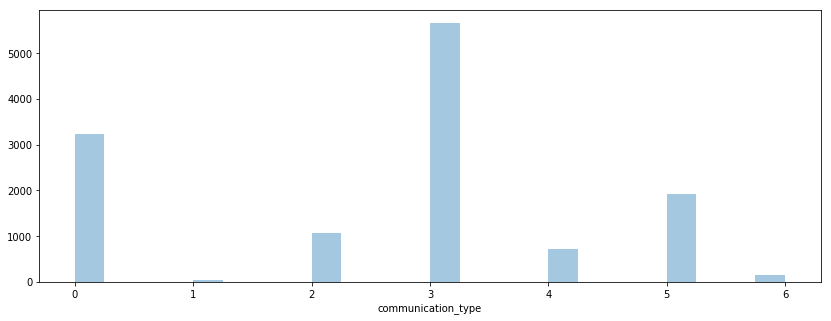

In [10]:
pos = train_f[train_f['is_click']==1]
plt.figure(figsize=(14, 5))
sns.distplot(pos.communication_type, kde = False)

## Distribution of Communication Type for is_click=0

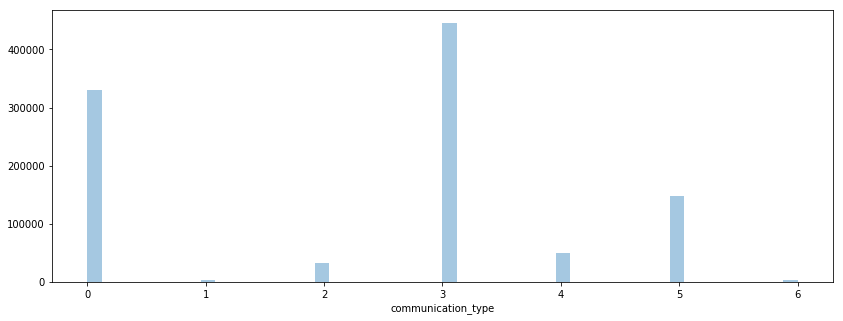

In [12]:
neg = train_f[train_f['is_click']==0]
plt.figure(figsize=(14, 5))
sns.distplot(neg.communication_type, kde = False)

## Distribution of Total Links Count for is_click=1 and is_click=0

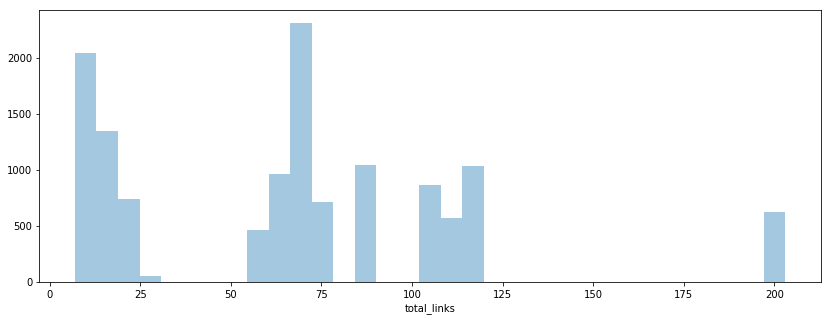

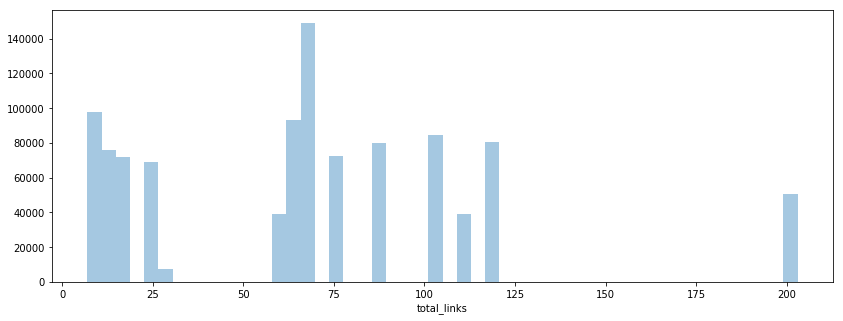

In [14]:
plt.figure(figsize=(14, 5))
sns.distplot(pos.total_links, kde = False)
plt.figure(figsize=(14, 5))
sns.distplot(neg.total_links, kde = False)

## Correlation Between Features

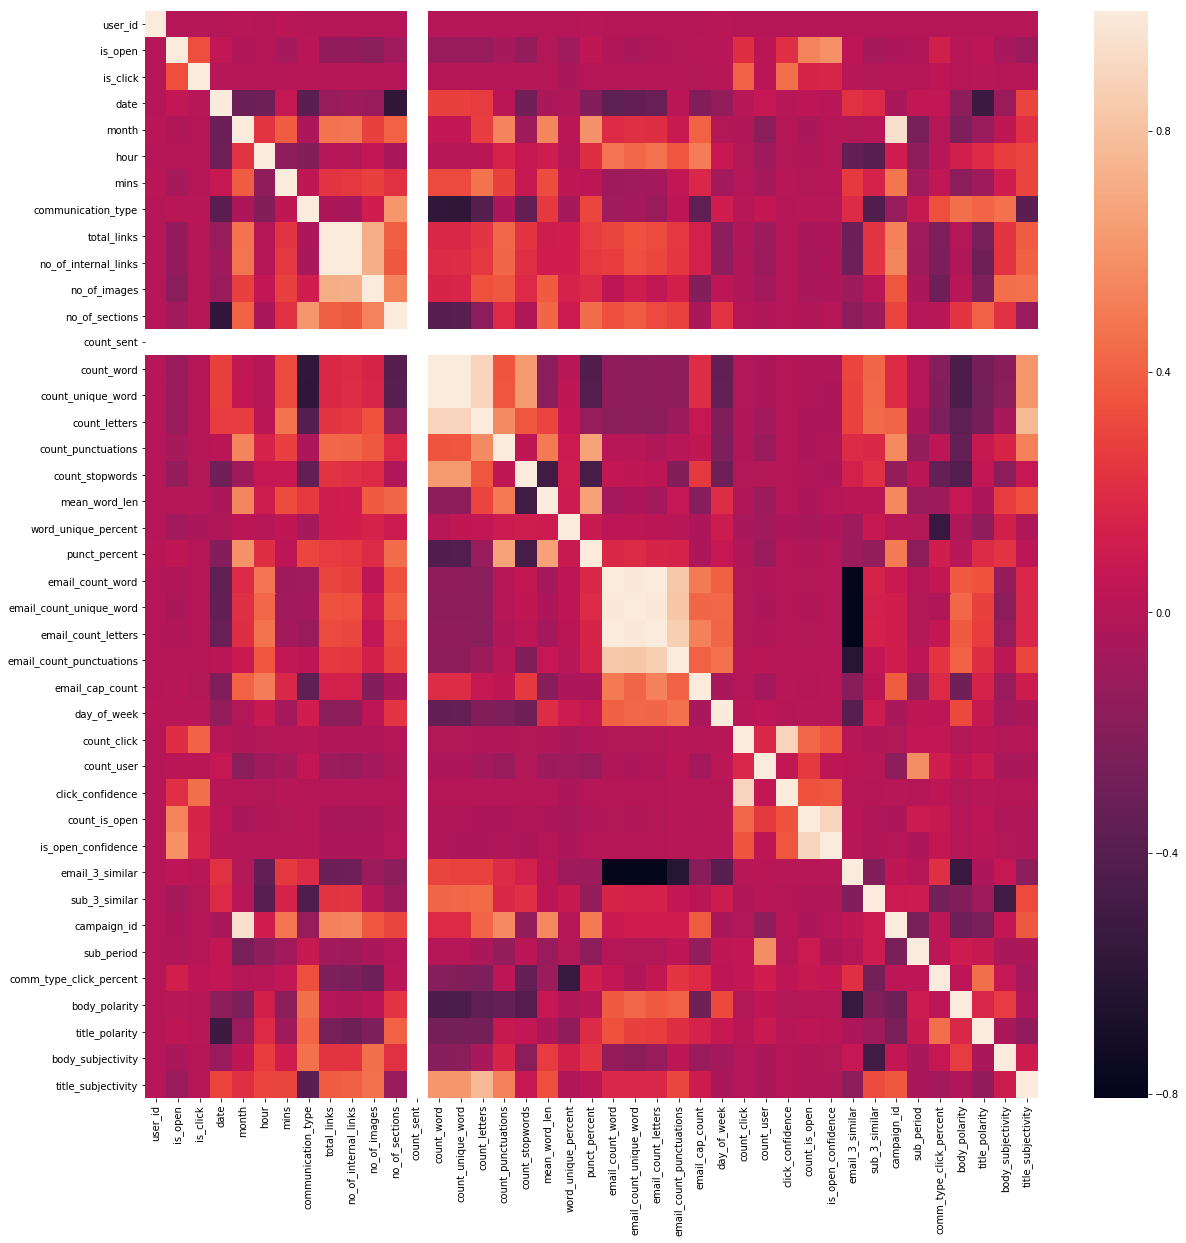

In [15]:
corr = train_f.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

## Distribution of User ID for is_click=1 and is_click=0

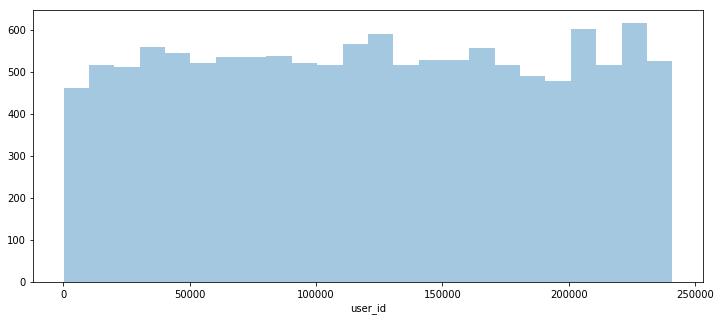

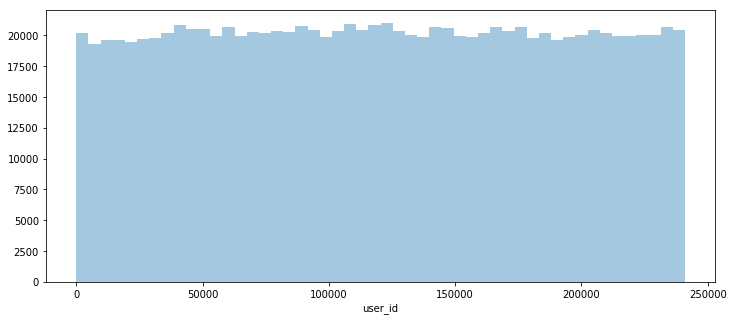

In [16]:
plt.figure(figsize=(12, 5))
sns.distplot(pos.user_id, kde = False)
plt.figure(figsize=(12, 5))
sns.distplot(neg.user_id, kde = False)

In [17]:
import numpy as np
np.set_printoptions(threshold=np.nan)

In [18]:
user_id_click = pos['user_id'].unique()

## Distribution of Click Confidence for is_click=1

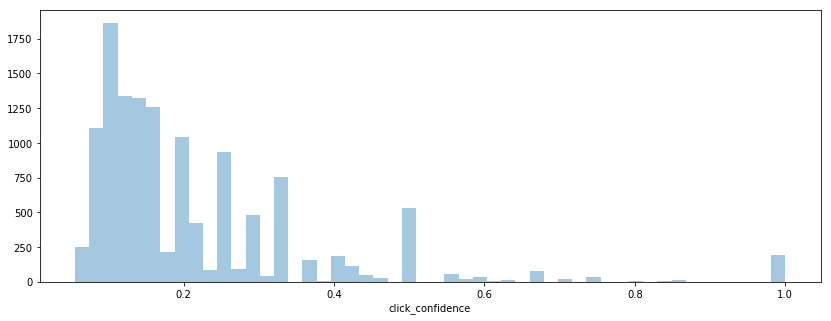

In [19]:
pos = train_f[train_f['is_click']==1]
plt.figure(figsize=(14, 5))
sns.distplot(pos.click_confidence, kde = False)

## Distribution of Click Confidence for is_click=0

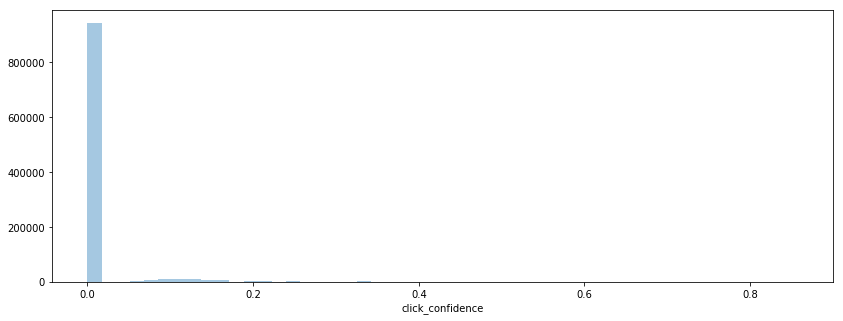

In [20]:
neg = train_f[train_f['is_click']==0]
plt.figure(figsize=(14, 5))
sns.distplot(neg.click_confidence, kde = False)

## Distribution of Open Confidence for is_click=1

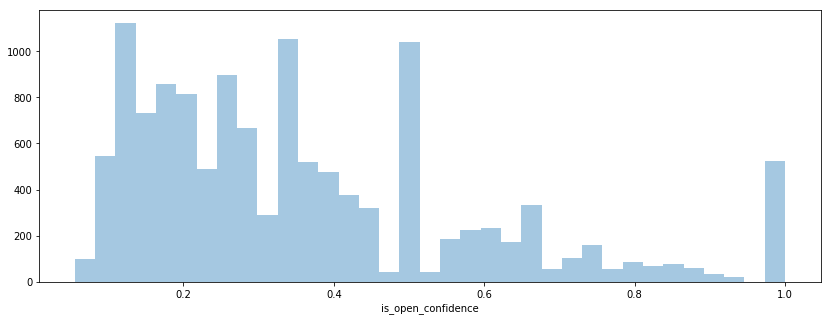

In [21]:
pos = train_f[train_f['is_click']==1]
plt.figure(figsize=(14, 5))
sns.distplot(pos.is_open_confidence, kde = False)

## Distribution of Open Confidence for is_click=0

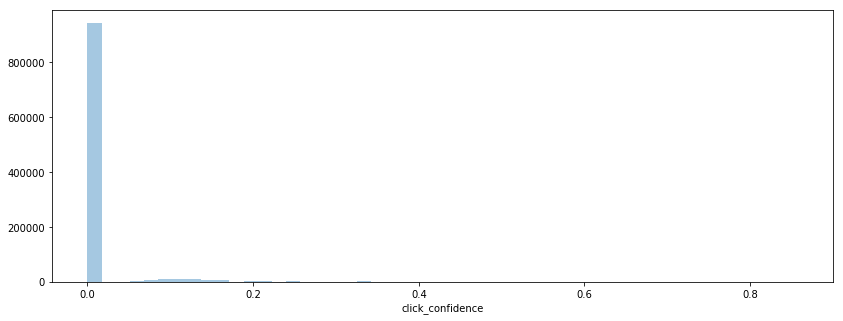

In [22]:
neg = train_f[train_f['is_click']==0]
plt.figure(figsize=(14, 5))
sns.distplot(neg.click_confidence, kde = False)

## Distribution of Campaign ID for is_click=1

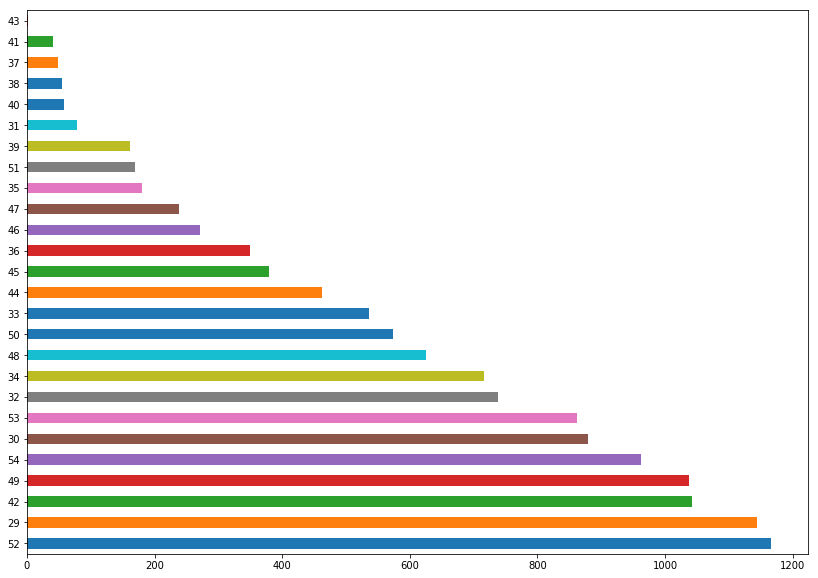

In [26]:
pos = train_f[train_f['is_click']==1]
plt.figure(figsize=(14, 5))
pos['campaign_id'].value_counts().plot(kind='barh', figsize=(14, 10))

## Distribution of Campaign ID for is_click=0

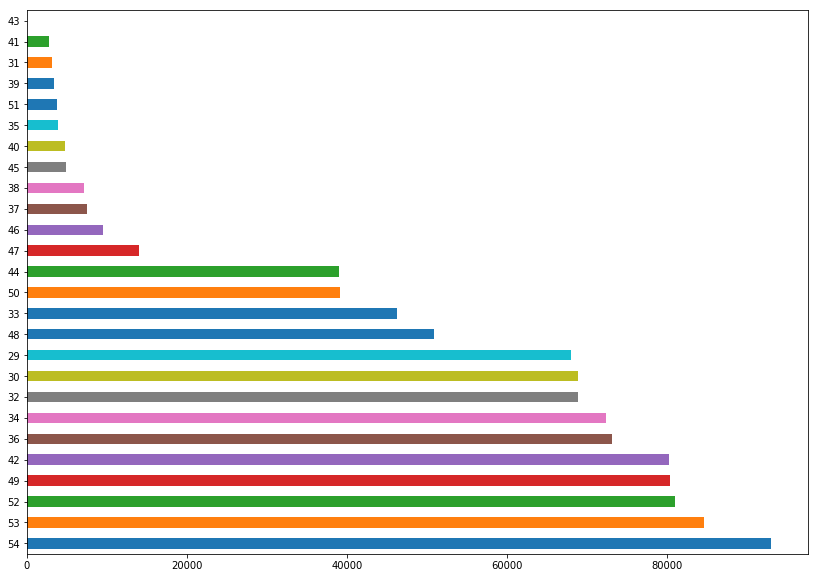

In [27]:
neg = train_f[train_f['is_click']==0]
plt.figure(figsize=(14, 5))
neg['campaign_id'].value_counts().plot(kind='barh', figsize=(14, 10))

## Distribution of Count User for is_click=1

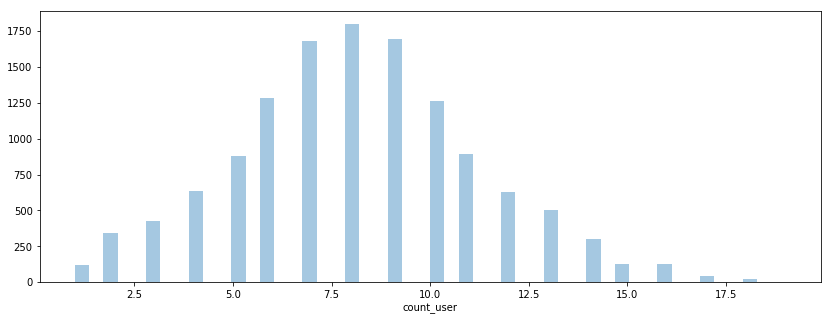

In [28]:
pos = train_f[train_f['is_click']==1]
plt.figure(figsize=(14, 5))
sns.distplot(pos.count_user, kde = False)

## Distribution of Count User for is_click=0

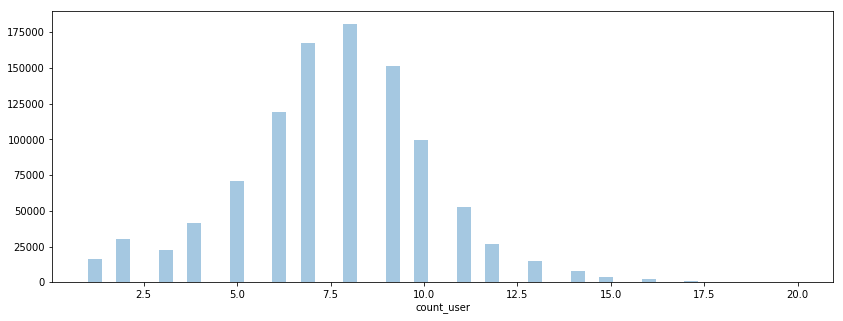

In [29]:
neg = train_f[train_f['is_click']==0]
plt.figure(figsize=(14, 5))
sns.distplot(neg.count_user, kde = False)

## Distribution of is_open for is_click=1

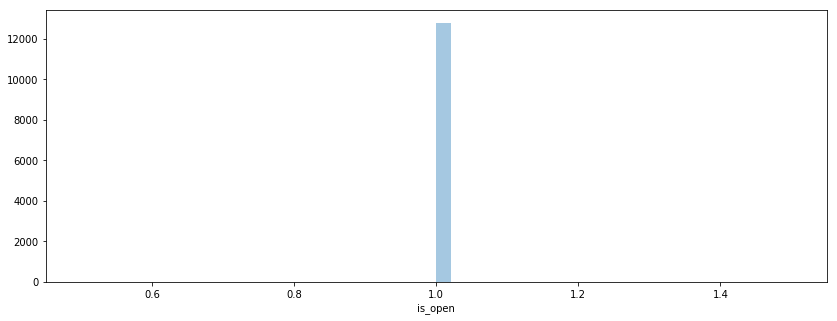

In [30]:
pos = train_f[train_f['is_click']==1]
plt.figure(figsize=(14, 5))
sns.distplot(pos.is_open, kde = False)

## Distribution of is_open for is_click=0

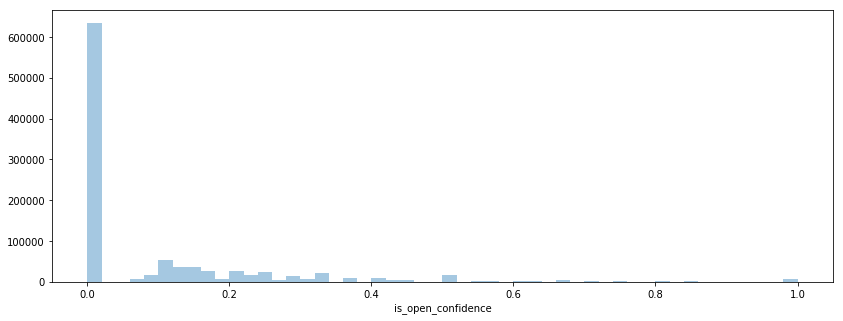

In [31]:
neg = train_f[train_f['is_click']==0]
plt.figure(figsize=(14, 5))
sns.distplot(neg.is_open_confidence, kde = False)

## End